In [1]:
import sys
import copy
import dataclasses

import numpy as np
import pandas as pd

from whynot.framework import GenericExperiment, parameter
from whynot.simulators import schelling
import whynot.utils as utils

import matplotlib.pyplot as plt


# Default configuration

In [36]:
default_config = schelling.Config()
default_config.height = 10
default_config.width = 10
default_config.homophily = 5
default_config.education_boost = -2 #education_boost
default_config.density = 0.4

control_config = copy.deepcopy(default_config)
control_config.education_pc = 0

config = copy.deepcopy(default_config)

# Experiments vary the number of treated individuals and minority percentage

In [44]:
rng = np.random.RandomState(0)
results = []#pd.DataFrame()
control = []#pd.DataFrame()
config.minority_pc = 0.25
ed_pcs = np.arange(0.025, 1.01, 0.025)
#ed_pcs = np.arange(0.025, 1.01, 0.05)
num_rollouts = 100

for ed_pc in ed_pcs:
    #config.minority_pc = rng.uniform(0.05, 0.45)
    config.education_pc = ed_pc
    
    seed = rng.randint(0, 99999)

    results.append(schelling.simulate(config, rollouts=num_rollouts, seed=seed, simple_RCT=False))
    control.append(schelling.simulate(control_config, rollouts=num_rollouts, seed=seed, simple_RCT=False))

In [45]:
results_arr = np.array(results)
results_arr[:5]


array([[0.02276176, 0.28333333, 0.40350674, 0.40470783, 0.9       ,
        0.025     ],
       [0.04116043, 0.32666667, 0.35046089, 0.35320462, 1.66      ,
        0.05      ],
       [0.07874811, 0.34083333, 0.3917874 , 0.3905352 , 3.12      ,
        0.075     ],
       [0.10043005, 0.44110823, 0.38729597, 0.39251587, 3.97      ,
        0.1       ],
       [0.11915946, 0.37858225, 0.38718992, 0.3880594 , 4.82      ,
        0.125     ]])

In [46]:
control_arr = np.array(control)

In [47]:
#plt.scatter(results_df['Treated_Agents'] / (results_df['Treated_Agents'] + results_df['Untreated_Agents']), results_df['Segregated_Treated_Agents'] - control_df['Segregated_Agents'])

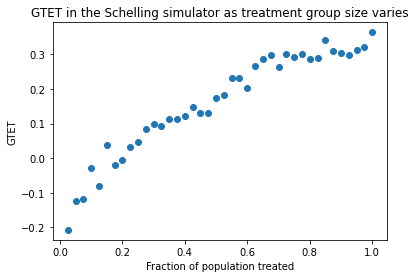

In [48]:
plt.figure()
plt.scatter(results_arr[:,-1], results_arr[:,1] - control_arr[:,3])

plt.title('GTET in the Schelling simulator as treatment group size varies')
plt.xlabel('Fraction of population treated')
plt.ylabel('GTET')
plt.savefig('schelling_gtet.pdf')
plt.show()

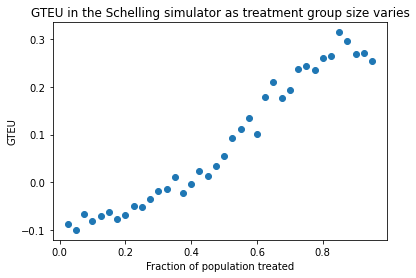

In [52]:
plt.figure()
end_idx = -2
plt.scatter(results_arr[:end_idx,-1], results_arr[:end_idx,2] - control_arr[:end_idx,3])
plt.title('GTEU in the Schelling simulator as treatment group size varies')
plt.xlabel('Fraction of population treated')
plt.ylabel('GTEU')
plt.savefig('schelling_gteu.pdf')
plt.show()

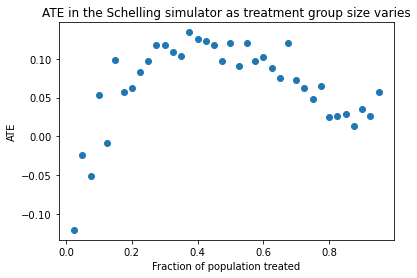

In [51]:
plt.figure()
end_idx = -2
plt.scatter(results_arr[:end_idx,-1], results_arr[:end_idx,1] - results_arr[:end_idx,2])
plt.title('ATE in the Schelling simulator as treatment group size varies')
plt.xlabel('Fraction of population treated')
plt.ylabel('ATE')
plt.savefig('schelling_ate.pdf')
plt.show()

In [60]:
np.arange(0.05, 1.05, 0.05)

array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])

In [8]:
np.arange(0.025, 1.01, 0.025)

array([0.025, 0.05 , 0.075, 0.1  , 0.125, 0.15 , 0.175, 0.2  , 0.225,
       0.25 , 0.275, 0.3  , 0.325, 0.35 , 0.375, 0.4  , 0.425, 0.45 ,
       0.475, 0.5  , 0.525, 0.55 , 0.575, 0.6  , 0.625, 0.65 , 0.675,
       0.7  , 0.725, 0.75 , 0.775, 0.8  , 0.825, 0.85 , 0.875, 0.9  ,
       0.925, 0.95 , 0.975, 1.   ])